## Dataset Explanation

This dataset contains demographic and employment information for individuals. It includes the following columns:

- **age:** Age of the individual.
- **workclass:** Type of employment.
- **fnlwgt:** Final weight, a measure used in census data sampling.
- **education:** Highest level of education achieved.
- **education-num:** Numeric representation of education level.
- **marital-status:** Marital status of the individual.
- **occupation:** Type of occupation.
- **relationship:** Relationship status.
- **race:** Ethnicity or race of the individual.
- **sex:** Gender of the individual.
- **capital-gain:** Capital gains recorded.
- **capital-loss:** Capital losses recorded.
- **hours-per-week:** Hours worked per week.
- **native-country:** Country of origin.
- **income:** Income level (target variable).

## Summary Statistics

- Total entries: 36,631
- Missing values: Workclass (724), Occupation (726), Native Country (196)

### Problem Statement

The goal of this machine learning project is to build a classification model that predicts the income level of individuals based on their demographic and employment features. The 'income' column is the target variable, and it appears to be a binary classification problem where the income is categorized as either above a certain threshold or not.

### Objective

Develop a machine learning model that accurately predicts whether an individual's income is above or below a certain threshold based on the provided features. Evaluate the model's performance using appropriate classification metrics and fine-tune as needed.

### Evaluation Metrics

We will use suitable metrics for binary classification, such as accuracy, precision, recall, F1 score

In [1]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization
import warnings  # Warnings library to manage warnings during execution

# Ignore warning messages for cleaner output
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline


## Gather and Understand Data

**Load the dataset**

In [2]:
# Read data from an Excel file ('Income Train.xlsx') and store it in a DataFrame (df)
df = pd.read_excel('Income Train.xlsx')

**Display the first few rows of the dataset**

In [3]:
# Display the first few rows of the DataFrame to get an overview of the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,18,Private,128538,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
1,36,Private,112271,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,1902,40,United-States,>50K.
2,35,Private,111387,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,1579,40,United-States,<=50K
3,55,Private,118993,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,10,United-States,<=50K
4,35,?,317780,Some-college,10,Never-married,?,Unmarried,Black,Female,0,0,40,United-States,<=50K


**Display basic information about the dataset**

In [4]:
# Display basic information about the DataFrame, including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36631 non-null  int64 
 1   workclass       35907 non-null  object
 2   fnlwgt          36631 non-null  int64 
 3   education       36631 non-null  object
 4   education-num   36631 non-null  int64 
 5   marital-status  36631 non-null  object
 6   occupation      35905 non-null  object
 7   relationship    36631 non-null  object
 8   race            36631 non-null  object
 9   sex             36631 non-null  object
 10  capital-gain    36631 non-null  int64 
 11  capital-loss    36631 non-null  int64 
 12  hours-per-week  36631 non-null  int64 
 13  native-country  36435 non-null  object
 14  income          36631 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.2+ MB


**Display summary statistics**

In [5]:
# Generate descriptive statistics for the numerical columns in the DataFrame
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,36631.000000,3.663100e+04,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.693265,1.896834e+05,10.094729,1114.312495,87.078922,40.438426
std,13.707549,1.055186e+05,2.569319,7631.756080,402.171549,12.401653
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175090e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781600e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377130e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Check for missing values**

In [6]:
# Check and count the number of missing values in each column of the DataFrame
df.isnull().sum()

age                 0
workclass         724
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        726
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    196
income              0
dtype: int64

**Unique values in categorical columns**

In [7]:
for column in df.select_dtypes(include='object').columns:
    # Print the unique values in the current column
    print("\033[1m" + column.upper() + ":\033[0m")  # \033[1m starts bold, \033[0m resets formatting
    print(f"Unique values in {column}: {df[column].unique()}")
    print()


WORKCLASS:
Unique values in workclass: ['Private' '?' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc' 'State-gov'
 'Federal-gov' nan 'Without-pay' 'Never-worked']

EDUCATION:
Unique values in education: ['11th' 'Bachelors' 'Some-college' 'HS-grad' 'Assoc-voc' '5th-6th' '9th'
 'Assoc-acdm' 'Prof-school' '10th' '7th-8th' 'Masters' 'Doctorate' '12th'
 '1st-4th' 'Preschool']

MARITAL-STATUS:
Unique values in marital-status: ['Never-married' 'Married-civ-spouse' 'Separated' 'Divorced' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse']

OCCUPATION:
Unique values in occupation: ['Sales' 'Tech-support' 'Handlers-cleaners' 'Exec-managerial' '?'
 'Adm-clerical' 'Farming-fishing' 'Machine-op-inspct' 'Craft-repair'
 'Other-service' 'Prof-specialty' 'Transport-moving' nan 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces']

RELATIONSHIP:
Unique values in relationship: ['Own-child' 'Husband' 'Unmarried' 'Not-in-family' 'Other-relative' 'Wife']

RACE:
Unique values in race: ['White' 'Black' 'Amer

## EDA & Feature Engineering 

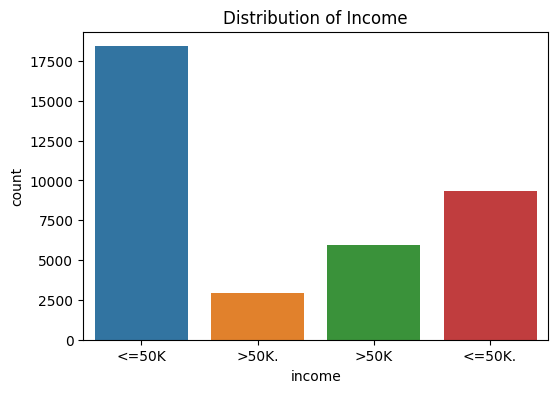

In [8]:
# Visualize the distribution of the target variable (income)
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.show()

**Analysis of the 'income' Column**

The 'income' column in the dataset appears to have some inconsistencies in the categories, as there are two similar categories for each income level, one ending with a period and the other without. These inconsistencies may need to be addressed to ensure accurate analysis.

After examining the data, it seems that the 'income' values can be standardized by removing the trailing periods. This would result in two main categories:

- **<=50K:** 27,785 entries (combining '<=50K' and '<=50K.')
- **>50K:** 8,846 entries (combining '>50K' and '>50K.')

This would resolve the duplicate entries and provide a more accurate representation of the income distribution in the dataset.

In [9]:
# Remove trailing periods from the 'income' column
df['income'] = df['income'].str.strip('.')
print(df['income'].value_counts())

income
<=50K    27785
>50K      8846
Name: count, dtype: int64


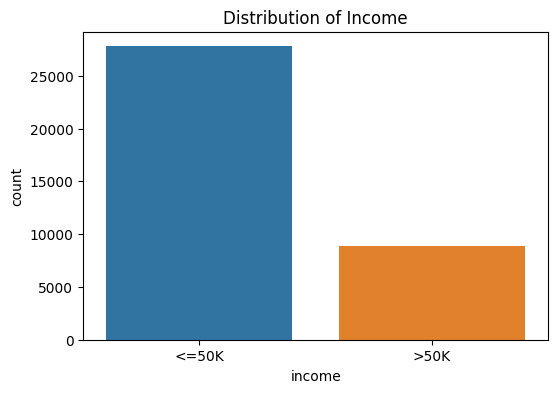

In [10]:
# Visualize the distribution of the target variable (income)
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.show()

#### Analysis of the 'income' Column

After cleaning the 'income' column by removing inconsistencies and standardizing categories, we now observe a clearer distribution:

- **<=50K:** 27,785 entries
- **>50K:** 8,846 entries

This indicates that a significant portion of the dataset falls into the '<=50K' income category, while a smaller portion belongs to the '>50K' income category.

The clean data allows for more accurate analysis and modeling, providing insights into the factors influencing income levels in the dataset. Further exploration of the relationships between income and other features may reveal patterns and contribute to a better understanding of the dataset.


### one hot encoding

In [11]:
# Perform one-hot encoding on the 'income' column and create new binary columns with 1s and 0s
# income_one_hot = pd.get_dummies(df['income'], prefix='income', drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame (df) without adding an index column
# df = pd.concat([df.reset_index(drop=True), income_one_hot], axis=1)

# Convert the one-hot encoded column 'income_>50K' to integers (1 and 0)
# df['income_>50K'] = df['income_>50K'].astype(int)

# drop the original 'income' column if needed
# df = df.drop('income', axis=1)

# OR 

# Convert 'income' to binary (0 for <=50K, 1 for >50K)
df['income_binary'] = df['income'].map({'<=50K': 0, '>50K': 1}) #  map function  transform values

# Display the first few rows of the DataFrame to check the changes
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary
0,18,Private,128538,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K,0
1,36,Private,112271,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,1902,40,United-States,>50K,1
2,35,Private,111387,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,1579,40,United-States,<=50K,0
3,55,Private,118993,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,10,United-States,<=50K,0
4,35,?,317780,Some-college,10,Never-married,?,Unmarried,Black,Female,0,0,40,United-States,<=50K,0


### Showing Educational Level in order

In [12]:
# Create a mapping between education levels and education numbers
education_mapping = df[['education', 'education-num']].drop_duplicates().set_index('education')['education-num'].to_dict()

# Print the mapping
for education, education_num in education_mapping.items():
    print(f"Educational Level: {education}, Education Number: {education_num}")


Educational Level: 11th, Education Number: 7
Educational Level: Bachelors, Education Number: 13
Educational Level: Some-college, Education Number: 10
Educational Level: HS-grad, Education Number: 9
Educational Level: Assoc-voc, Education Number: 11
Educational Level: 5th-6th, Education Number: 3
Educational Level: 9th, Education Number: 5
Educational Level: Assoc-acdm, Education Number: 12
Educational Level: Prof-school, Education Number: 15
Educational Level: 10th, Education Number: 6
Educational Level: 7th-8th, Education Number: 4
Educational Level: Masters, Education Number: 14
Educational Level: Doctorate, Education Number: 16
Educational Level: 12th, Education Number: 8
Educational Level: 1st-4th, Education Number: 2
Educational Level: Preschool, Education Number: 1


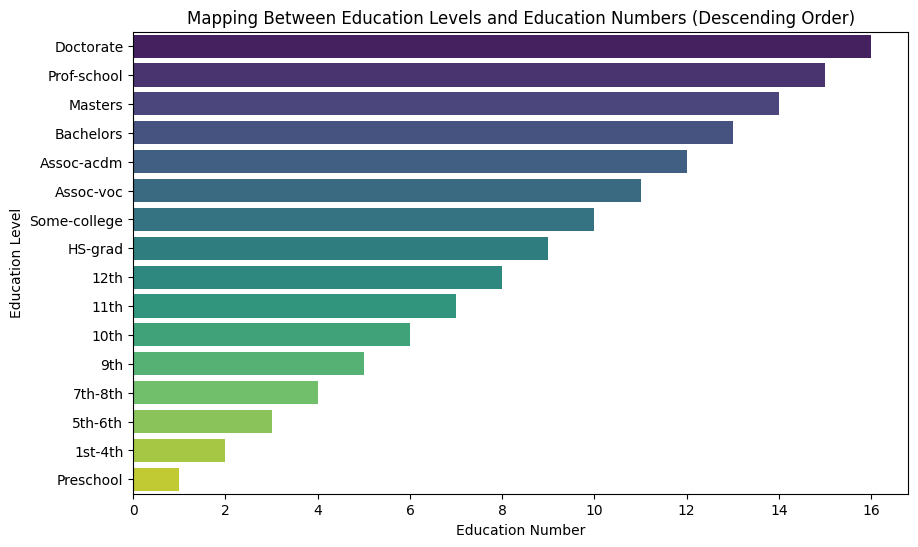

In [13]:
# Create a mapping between education levels and education numbers
education_mapping = df[['education', 'education-num']].drop_duplicates().set_index('education')['education-num'].to_dict()

# Create a DataFrame from the mapping
education_df = pd.DataFrame(list(education_mapping.items()), columns=['Education Level', 'Education Number'])

# Sort the DataFrame by 'Education Number' in descending order
education_df = education_df.sort_values(by='Education Number', ascending=False)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Education Number', y='Education Level', data=education_df, palette='viridis')

# Add labels and title
plt.xlabel('Education Number')
plt.ylabel('Education Level')
plt.title('Mapping Between Education Levels and Education Numbers (Descending Order)')

# Show the plot
plt.show()

### EDA showing relationship for income

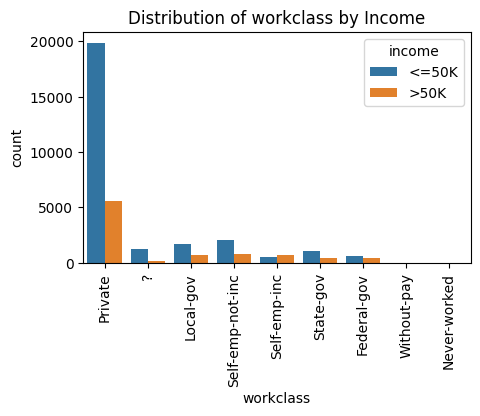

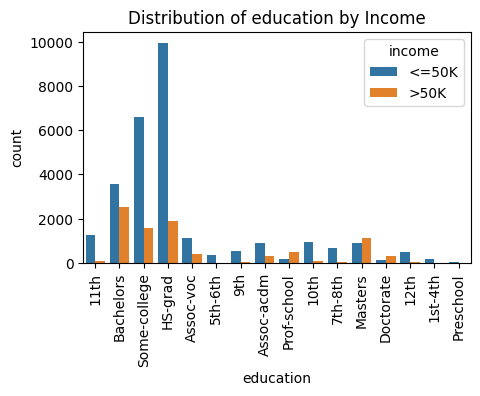

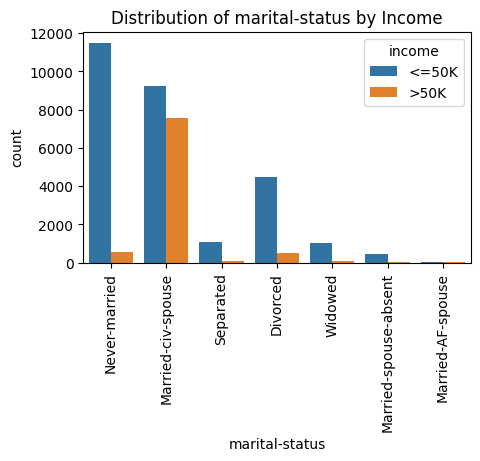

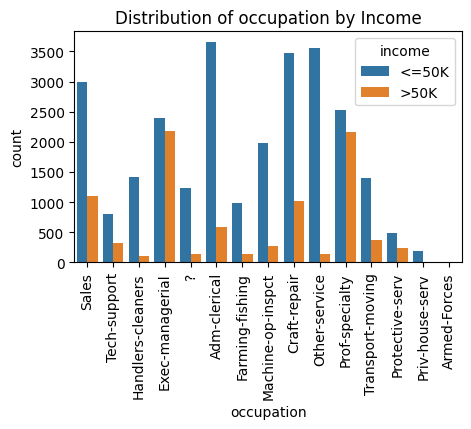

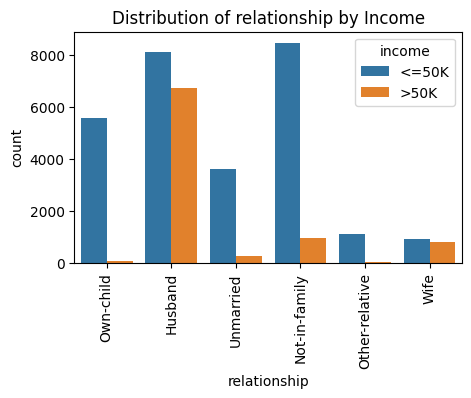

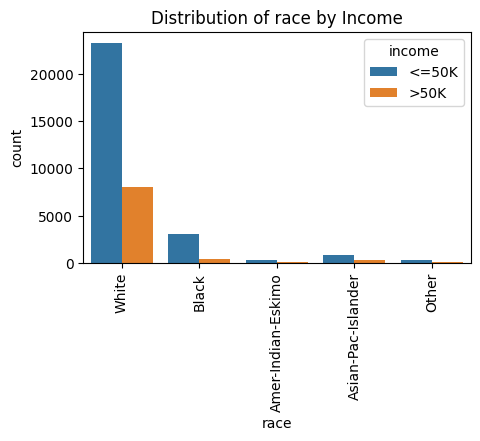

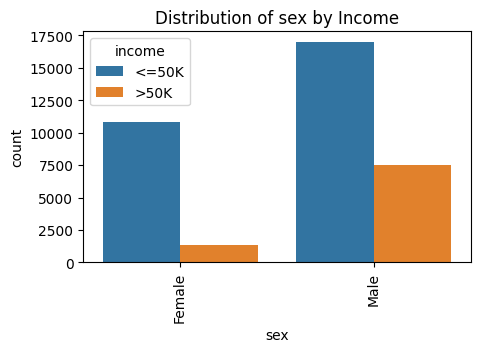

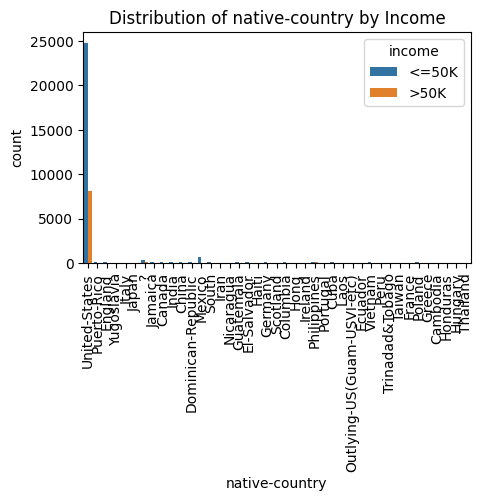

In [14]:
# Explore relationship between categorical features and income
for column in df.select_dtypes(include='object').columns:
    # Exclude the 'income' column itself from the analysis
    if column != 'income':
        # Set up the figure size
        plt.figure(figsize=(5, 3))

        # Create a count plot for the current categorical feature
        sns.countplot(x=column, hue='income', data=df)

        # Add title to the plot
        plt.title(f'Distribution of {column} by Income')

        # Rotate x-axis labels by 90 degrees for better readability
        plt.xticks(rotation=90)

        # Display the plot
        plt.show()


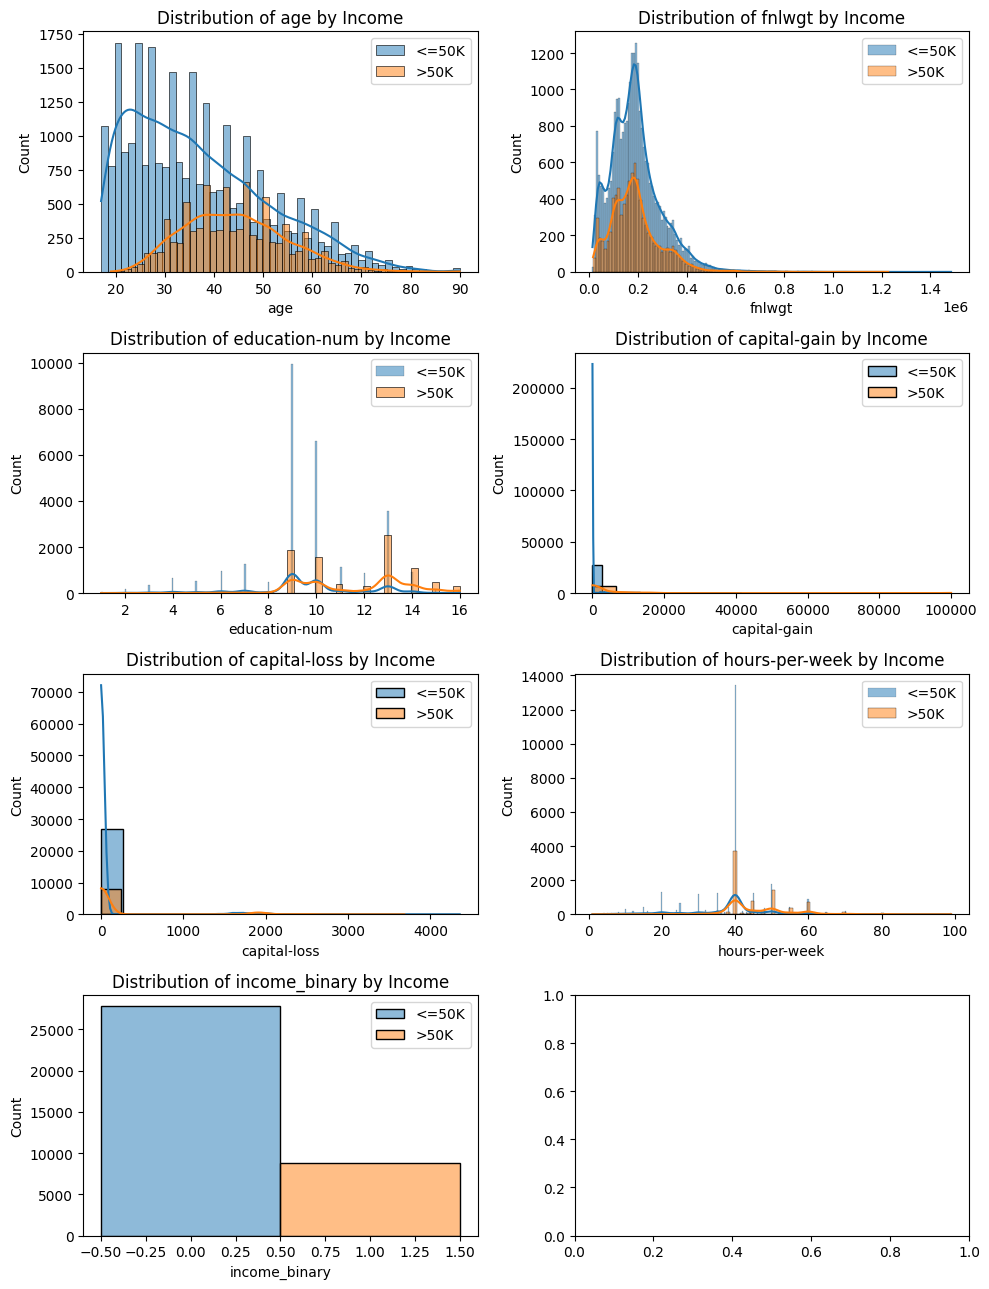

In [15]:
# Explore relationship between numerical features and income
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the number of subplots and their arrangement
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 13))

# Flatten the axes array to handle different subplot configurations
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    # Create a histogram for income <=50K
    sns.histplot(df[df['income'] == '<=50K'][column], kde=True, label='<=50K', ax=axes[i])

    # Create a histogram for income >50K
    sns.histplot(df[df['income'] == '>50K'][column], kde=True, label='>50K', ax=axes[i])

    # Add title to the subplot
    axes[i].set_title(f'Distribution of {column} by Income')

    # Display a legend to differentiate between income levels
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


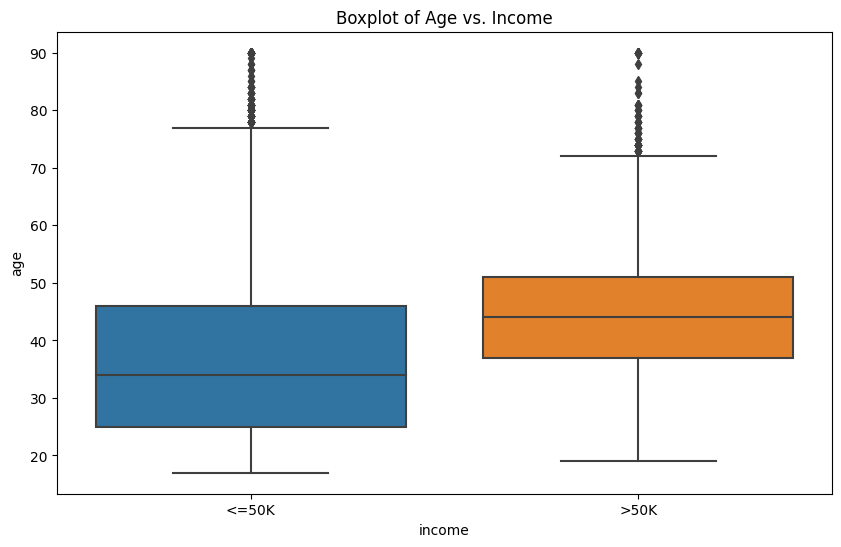

In [16]:
# Boxplot for age vs. income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Boxplot of Age vs. Income')
plt.show()

**Pairplot**

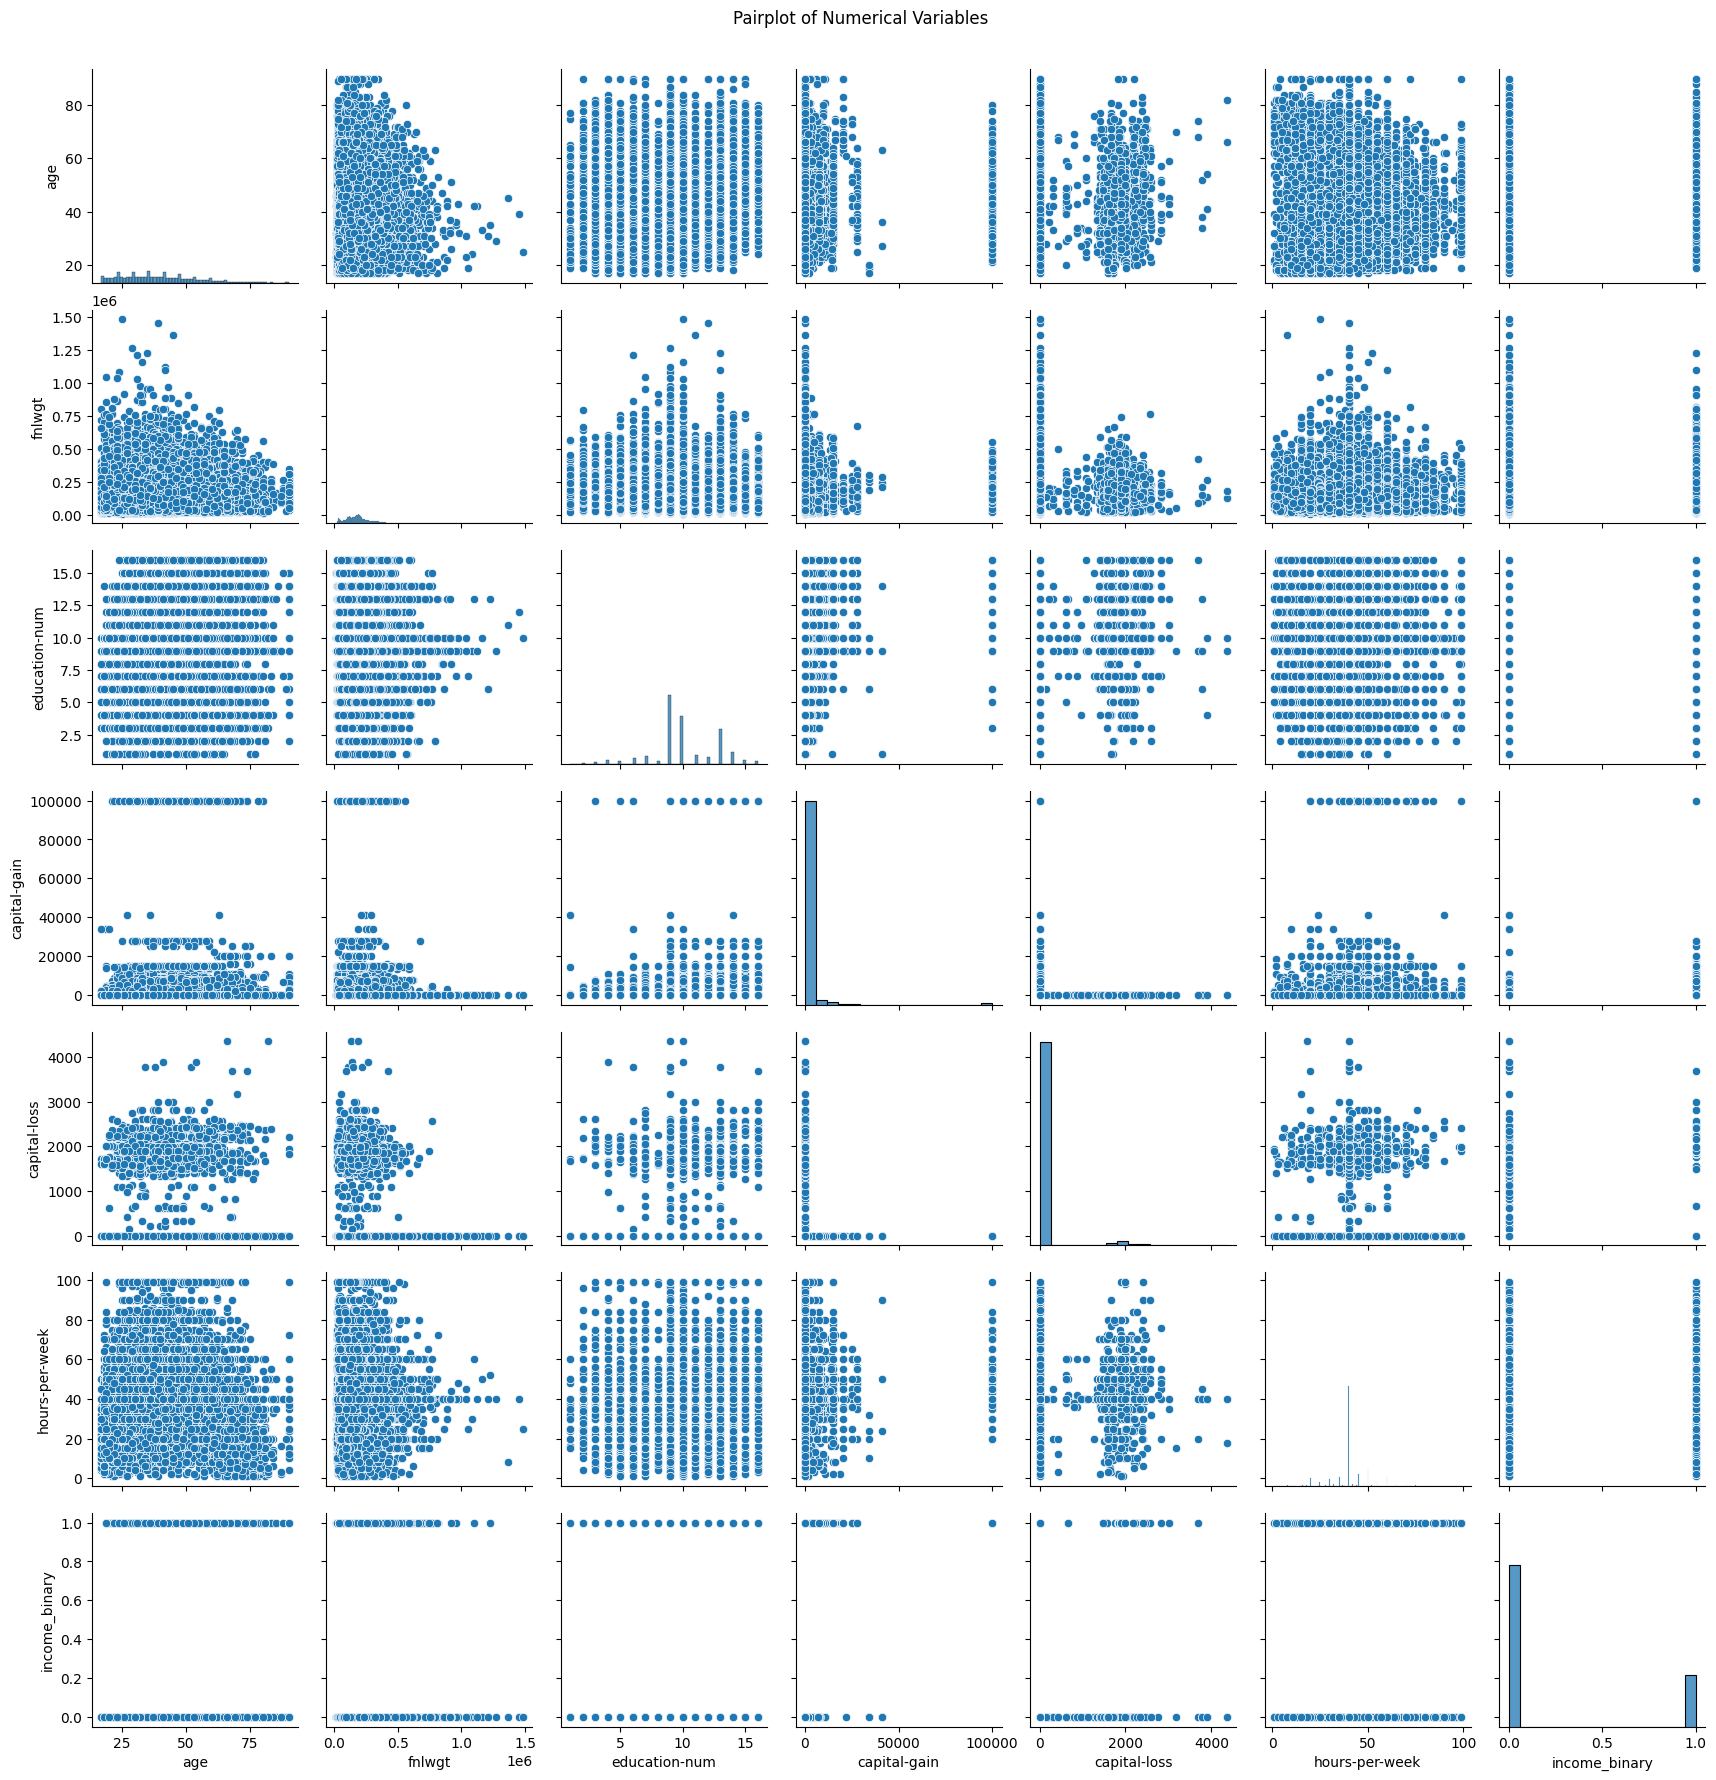

In [17]:
# Pairplot for numerical variables
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

**Heatmap**

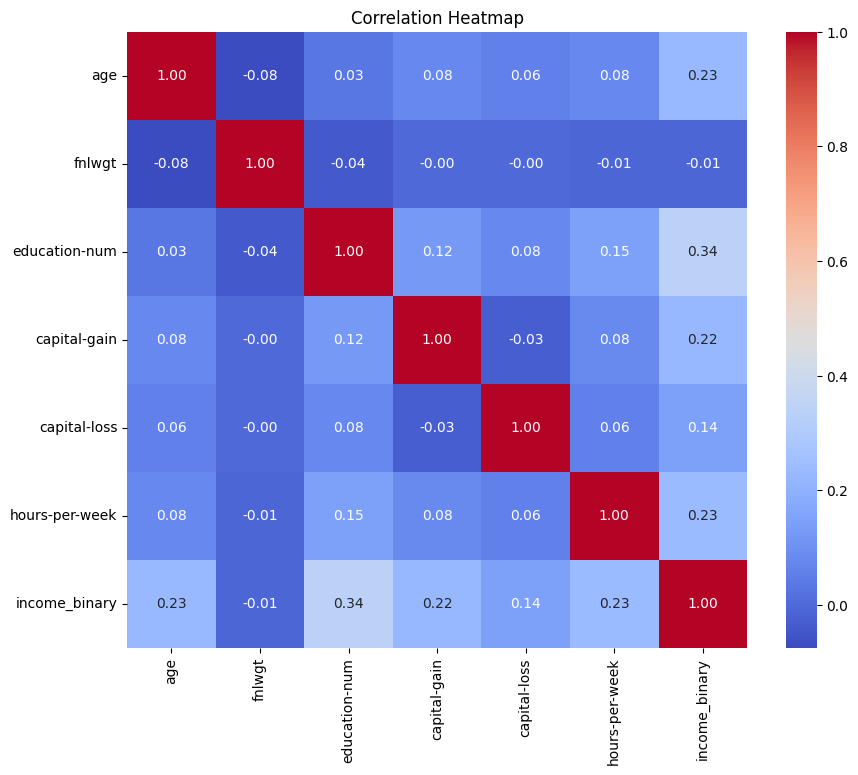

In [18]:
# Correlation heatmap
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

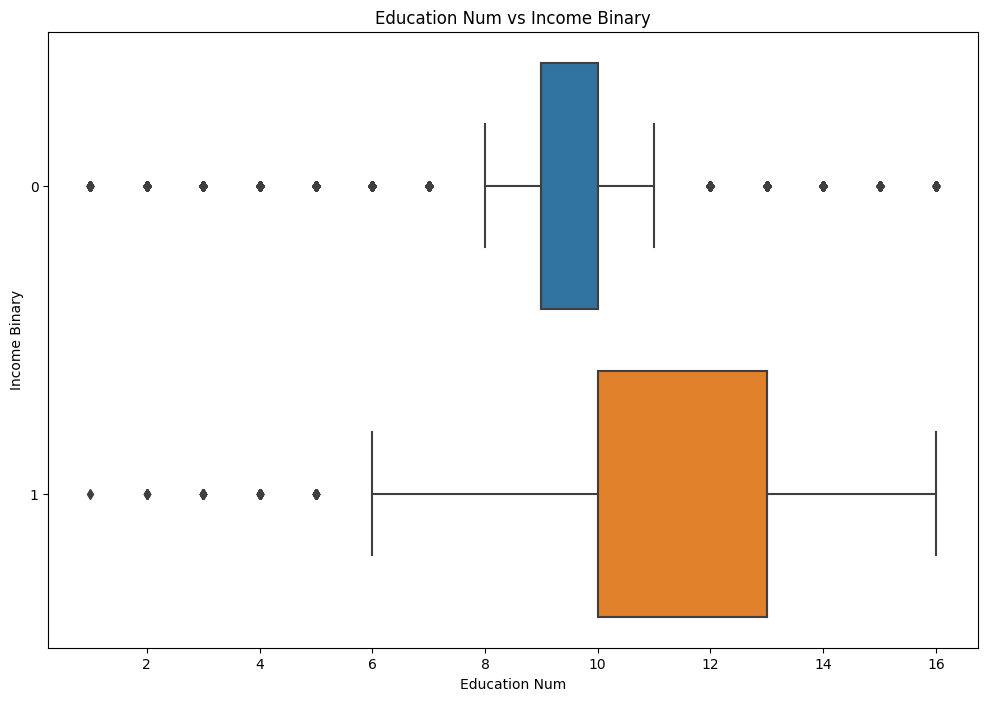

In [19]:
# EDA: Education-num vs Income
plt.figure(figsize=(12, 8))
sns.boxplot(x='education-num', y='income_binary', data=df, orient='h')
plt.xlabel('Education Num')
plt.ylabel('Income Binary')
plt.title('Education Num vs Income Binary')
plt.show()

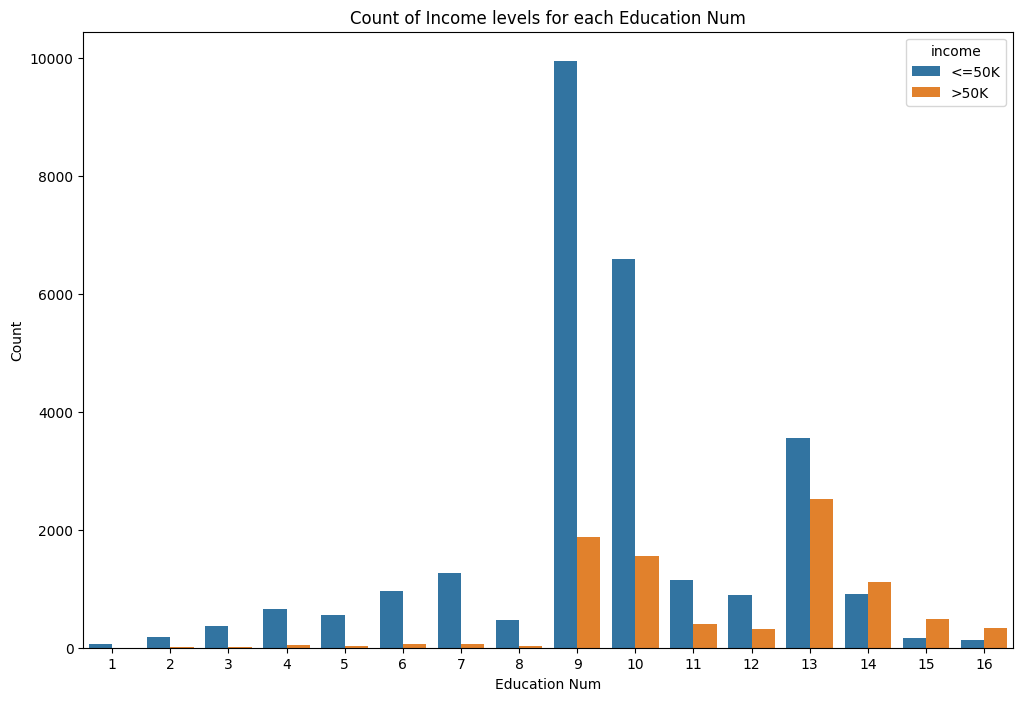

In [20]:
# EDA: Count plot for Education Num and Income
plt.figure(figsize=(12, 8))
sns.countplot(x='education-num', hue='income', data=df)
plt.xlabel('Education Num')
plt.ylabel('Count')
plt.title('Count of Income levels for each Education Num')
plt.show()

In [21]:
from scipy.stats import chi2_contingency

# Create a new binary variable indicating whether income is greater than 50K
df['income_binary'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Create a new variable indicating whether education-num is in the specified range
df['education_range_10_13'] = (df['education-num'] >= 10) & (df['education-num'] <= 13)

# Create a contingency table
contingency_table = pd.crosstab(df['education_range_10_13'], df['income_binary'])

# Perform chi-squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Check if the p-value is less than the significance level (e.g., 0.05)
if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


Chi-squared value: 286.91068131325676
P-value: 2.3426269348345798e-64
Reject the null hypothesis: There is a significant difference.


The chi-squared test results indicate that there is a significant difference in the distribution of income levels between the education-num range from 10 to 13 and the rest of the education-num values.

- **Chi-squared value:** The chi-squared value is a measure of the extent of the difference between the observed and expected frequencies in the contingency table. In this case, the chi-squared value is relatively large (286.91), suggesting a substantial difference.

- **P-value:** The p-value is very close to zero (2.34e-64), which is significantly below a common significance level like 0.05. This low p-value indicates strong evidence against the null hypothesis.

- **Interpretation:** With a low p-value, you reject the null hypothesis. Therefore, you can conclude that there is a statistically significant association between the education-num range from 10 to 13 and the income level. In practical terms, it suggests that the proportion of people with income >50K differs significantly between the specified education-num range and the rest.

In summary, the results provide statistical evidence that education-num in the range from 10 to 13 is associated with a significant difference in the likelihood of having an income greater than 50K compared to other education-num values in the dataset.


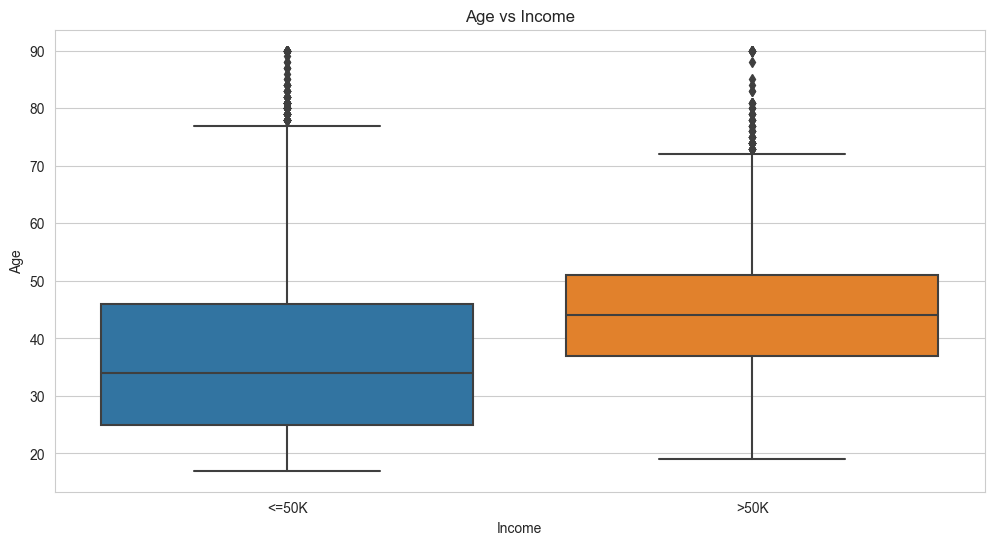

In [22]:
# EDA: Age vs Income with specific style
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='income', y='age', data=df)
    plt.xlabel('Income')
    plt.ylabel('Age')
    plt.title('Age vs Income')
    plt.show()

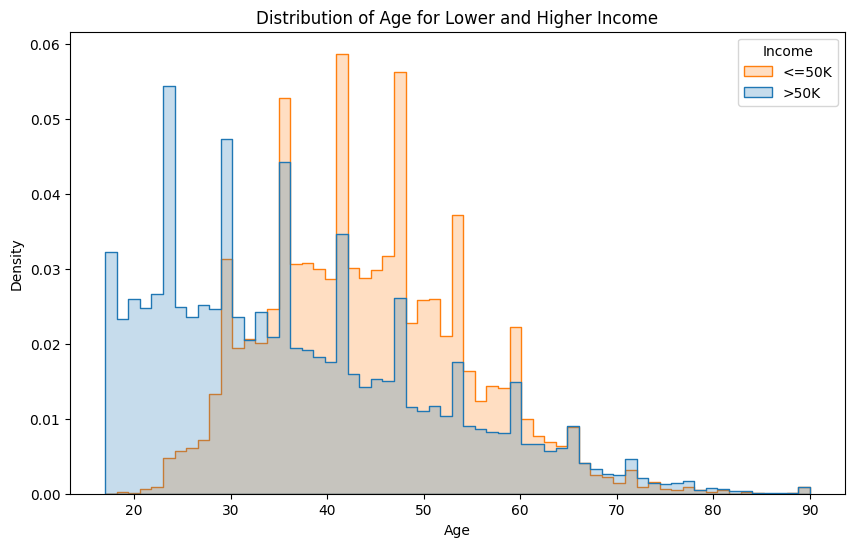

In [23]:
# Create a histogram for age, separating by income levels
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', hue='income', element='step', stat='density', common_norm=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age for Lower and Higher Income')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

In [24]:
from scipy.stats import ttest_ind

# Define high age threshold (you can adjust this threshold)
high_age_threshold = 60

# Create two groups based on age
high_age_group = df[df['age'] >= high_age_threshold]['income_binary']
low_age_group = df[df['age'] < high_age_threshold]['income_binary']

# Perform t-test for independent samples
t_stat, p_value = ttest_ind(high_age_group, low_age_group)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-statistic: -0.23833171512825368
P-value: 0.8116251580197089
Fail to reject the null hypothesis: There is no significant difference.


The results of the t-test for comparing the mean income between individuals with high age (e.g., age >= 60) and the rest of the population are as follows:

- **T-statistic:** -0.24
- **P-value:** 0.81

The null hypothesis (H0) in this test is that there is no significant difference in the mean income between the two groups. The alternative hypothesis (H1) is that there is a significant difference.

Since the p-value is relatively high (0.81), significantly above the common significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the mean income between individuals with high age and the rest of the population.

In summary, based on the t-test results, we do not have enough evidence to conclude that high age is associated with a significant difference in income levels in the given dataset.


In [25]:
from scipy.stats import ttest_ind

# Create a new binary variable indicating whether income is greater than 50K
df['income_binary'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Define the two groups based on age range
age_range_37_51 = df[(df['age'] >= 37) & (df['age'] <= 51)]['income_binary']
other_age_range = df[(df['age'] < 37) | (df['age'] > 51)]['income_binary']

# Perform t-test for independent samples
t_stat, p_value = ttest_ind(age_range_37_51, other_age_range)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-statistic: 42.57215951719537
P-value: 0.0
Reject the null hypothesis: There is a significant difference.


The results of the t-test for comparing the mean income between the age range from 37 to 51 and the rest are as follows:

- **T-statistic:** 42.57
- **P-value:** 0.0

The null hypothesis (H0) in this test is that there is no significant difference in the mean income between the specified age range and the rest. The alternative hypothesis (H1) is that there is a significant difference.

Since the p-value is extremely low (0.0), significantly below the common significance level of 0.05, we reject the null hypothesis. This indicates strong evidence that there is a significant difference in the mean income between the age range from 37 to 51 and the rest of the ages.

In summary, the t-test suggests that there is a statistically significant difference in the income levels between individuals aged 37 to 51 and those outside this age range. The t-statistic of 42.57 indicates a substantial difference in means.


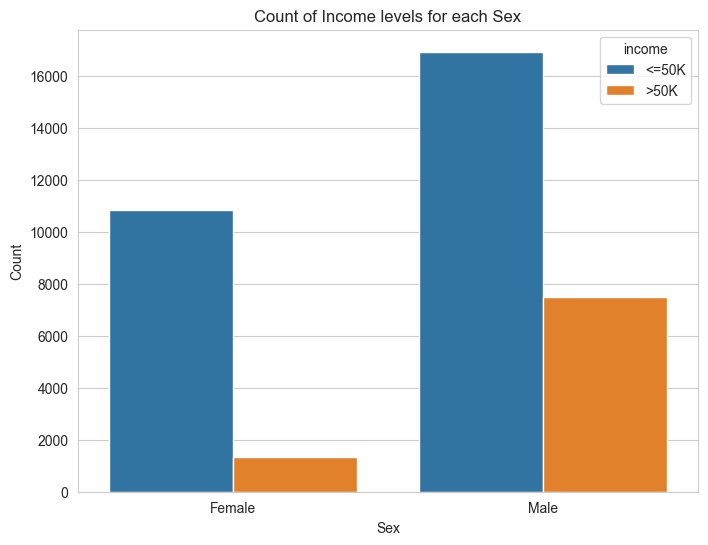

In [26]:
# Set the style for seaborn
with sns.axes_style("whitegrid"):
    # EDA: Sex vs Income
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sex', hue='income', data=df)
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.title('Count of Income levels for each Sex')
    plt.show()
    

In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table for sex and income
contingency_table = pd.crosstab(df['sex'], df['income_binary'])

# Perform chi-squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Check if the p-value is less than the significance level (e.g., 0.05)
if p < 0.05:
    print("Reject the null hypothesis: There is a significant difference in income between males and females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in income between males and females.")


Chi-squared value: 1730.7125324561232
P-value: 0.0
Reject the null hypothesis: There is a significant difference in income between males and females.


The results of the chi-squared test for independence between sex and income are as follows:

- **Chi-squared value:** 1730.71
- **P-value:** 0.0

The null hypothesis (H0) in this test is that there is no association between sex and income. The alternative hypothesis (H1) is that there is a significant association.

Since the p-value is extremely low (0.0), significantly below the common significance level of 0.05, we reject the null hypothesis. This indicates strong evidence that there is a significant difference in the ratio of income >50K between males and females.

In summary, the chi-squared test suggests that there is a statistically significant difference in the distribution of income levels between males and females. The chi-squared value of 1730.71 indicates a substantial association between sex and income.


### Missing Values

Missing values refer to the absence or lack of data in certain observations or variables within a dataset. These values are typically represented by placeholders such as NaN (Not a Number) in numerical datasets or other designated indicators in categorical datasets. Dealing with missing values is a crucial aspect of data preprocessing and analysis, requiring careful consideration to ensure accurate and unbiased results in statistical analyses and machine learning models.


In [28]:
# Fill missing values in the 'workclass' column with the mode (most frequent value)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

# Fill missing values in the 'occupation' column with the mode (most frequent value)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Fill missing values in the 'native-country' column with the mode (most frequent value)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)


#### Handling Missing Values in the Dataset

In the given dataset, certain columns such as 'workclass', 'occupation', and 'native-country' contain missing values. It is crucial to address these missing values as they can impact the quality of data analysis and machine learning model performance.

**Steps Taken:**

1. **'Workclass' Column:**
   - Missing values in the 'workclass' column have been filled using the mode (most frequent value) of the column.
  
2. **'Occupation' Column:**
   - Similar to 'workclass', missing values in the 'occupation' column have been replaced with the mode.

3. **'Native-Country' Column:**
   - For the 'native-country' column, missing values have been imputed with the mode.

#### Reason for Using Mode:

The mode represents the most frequently occurring value in a column. It is a suitable choice for imputing missing values when dealing with categorical data. By using the mode, we aim to maintain the integrity of the original data distribution and minimize the impact of missing values on subsequent analyses or machine learning models.

These steps ensure a more complete and accurate dataset for downstream tasks.


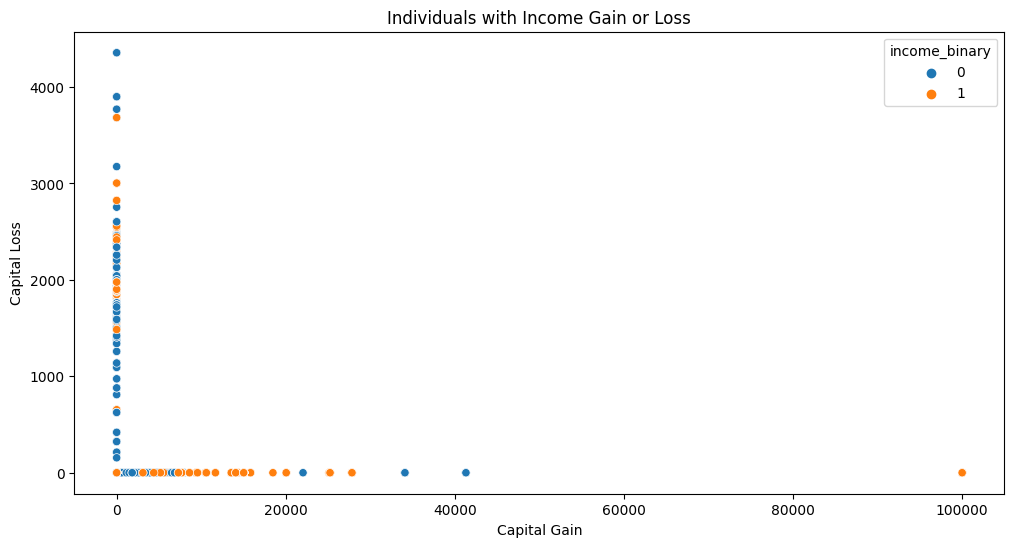

In [29]:
# Plot individuals with income gain or loss

plt.figure(figsize=(12, 6)) # Set the figsize

# Create a scatter plot with 'capital-gain' on the x-axis, 'capital-loss' on the y-axis, and color-coded by 'income_binary'
sns.scatterplot(x='capital-gain', y='capital-loss', hue='income_binary', data=df)
plt.title('Individuals with Income Gain or Loss') # Set the title of the plot
plt.xlabel('Capital Gain') # Label the x-axis
plt.ylabel('Capital Loss') # Label the y-axis
plt.show() # Show the plot


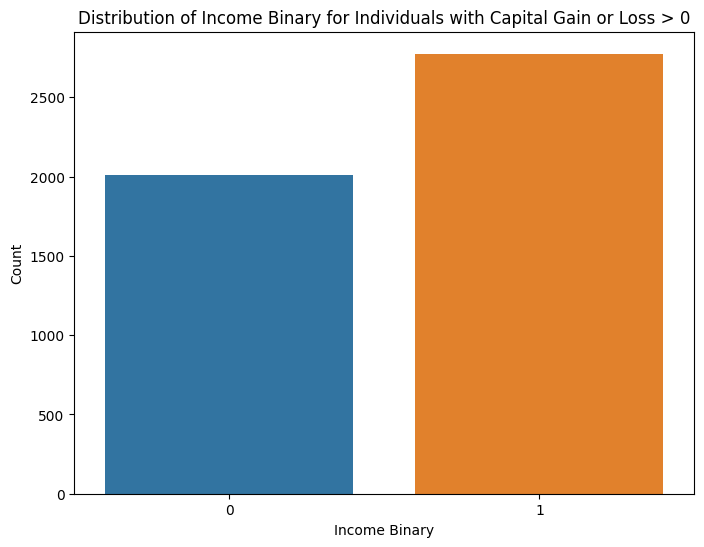

In [30]:
# Create a filtered DataFrame for individuals with either capital gain or capital loss greater than 0
filtered_df = df[(df['capital-gain'] > 0) | (df['capital-loss'] > 0)]

# Plot the distribution of income binary for the filtered individuals
plt.figure(figsize=(8, 6))  # Set the figsize for the plot

# Use Seaborn's countplot to visualize the distribution of 'income_binary' for the filtered DataFrame
sns.countplot(x='income_binary', data=filtered_df)

# Set the title of the plot
plt.title('Distribution of Income Binary for Individuals with Capital Gain or Loss > 0')

# Label the x-axis
plt.xlabel('Income Binary')

# Label the y-axis
plt.ylabel('Count')

# Show the plot
plt.show()


In [31]:
# Combine 'capital-gain' and 'capital-loss' into a single feature 'net-capital'
df['net-capital'] = df['capital-gain'] - df['capital-loss']

# Create a 'has-capital' binary feature indicating if the individual has any capital gains or losses
df['has-capital'] = (df['capital-gain'] > 0) | (df['capital-loss'] > 0)

# If 'net-capital' is negative, set 'has-capital' to False for half of the rows
df.loc[df['net-capital'] < 0, 'has-capital'] = False

# Check whether NaN is fild or not 
df.isnull().sum()

age                      0
workclass                0
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
native-country           0
income                   0
income_binary            0
education_range_10_13    0
net-capital              0
has-capital              0
dtype: int64

#### Feature Engineering and Handling Missing Values in the Dataset

In this data preprocessing step, several operations are performed to enhance the dataset and address specific characteristics:

#### Feature Combination:
- **'net-capital' Feature Creation:**
  - A new feature 'net-capital' is created by subtracting 'capital-loss' from 'capital-gain'. This combined feature provides a consolidated measure of an individual's financial gains or losses.

#### Binary Feature Creation:
- **'has-capital' Binary Feature:**
  - Another binary feature 'has-capital' is introduced to indicate whether an individual has any capital gains or losses. It is computed based on the logical OR operation between 'capital-gain' and 'capital-loss'.

#### Handling Negative 'net-capital':
- **Adjusting 'has-capital' for Negative 'net-capital':**
  - In cases where 'net-capital' is negative, indicating more losses than gains, 'has-capital' is set to False for half of the rows. This adjustment ensures a more accurate representation of individuals without significant capital.

#### Checking for Missing Values:
- **NaN Check:**
  - A check is performed to identify and count missing values in the dataset using `df.isnull().sum()`.

These preprocessing steps contribute to a more informative and complete dataset, better suited for subsequent analyses or machine learning modeling.


In [32]:
df['age_range_37_51'] = df['age'].apply(lambda x: 1 if 37 <= x <= 51 else 0)

- This line creates a new binary column age_range_37_51 in the DataFrame (df).
- The lambda function inside apply checks if the age of an individual falls within the range of 37 to 51 (inclusive). If yes, it assigns 1; otherwise, it assigns 0.
- This new column is a binary indicator, essentially capturing whether an individual's age is within the specified range.

In [33]:
df['education_range_10_13'] = df['education-num'].apply(lambda x: 1 if 10 <= x <= 13 else 0)


- Similar to the first line, this line creates a new binary column education_range_10_13.
- It checks if the education-num falls within the range of 10 to 13 (inclusive). If yes, it assigns 1; otherwise, it assigns 0.
- This new column acts as a binary indicator for whether an individual's education level is within the specified range.

In [34]:
df['age_sex_interaction'] = df['age'] * df['sex'].map({'Male': 1, 'Female': 0})

- This line creates a new column age_sex_interaction.
- It multiplies the age by a binary indicator based on the 'sex' column. If the sex is 'Male', it multiplies by 1; if 'Female', it multiplies by 0.
- The purpose is to capture an interaction effect between age and sex. This interaction feature helps the model understand if the impact of age on income is different for males and females.

In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,income,income_binary,education_range_10_13,net-capital,has-capital,age_range_37_51,age_sex_interaction
0,18,Private,128538,11th,7,Never-married,Sales,Own-child,White,Female,...,0,25,United-States,<=50K,0,0,0,False,0,0
1,36,Private,112271,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,...,1902,40,United-States,>50K,1,1,-1902,False,0,36
2,35,Private,111387,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,...,1579,40,United-States,<=50K,0,1,-1579,False,0,35
3,55,Private,118993,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,...,0,10,United-States,<=50K,0,1,0,False,0,0
4,35,?,317780,Some-college,10,Never-married,?,Unmarried,Black,Female,...,0,40,United-States,<=50K,0,1,0,False,0,0


In [36]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Drop the 'income_binary' column
df = df.drop('income_binary', axis=1)

def encode_categorical_columns(df):
    # Identify object-type columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Create a new DataFrame to store the encoded values
    df_encoded = df.copy()

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    for column in categorical_columns:
        # Replace NaN with a placeholder value (you can customize this)
        df_encoded[column].fillna('unknown', inplace=True)

        # Encode the categorical column and store the mapping
        df_encoded[column + '_encoded'] = label_encoder.fit_transform(df_encoded[column])

    return df_encoded

# Assuming df is your DataFrame
df_encoded = encode_categorical_columns(df)

# Display the changes

# Loop through columns of object data type in the original DataFrame
for column in df.select_dtypes(include=['object']).columns:
    # Get unique values in the original and encoded columns
    unique_values_original = df[column].unique()
    unique_values_encoded = df_encoded[column + '_encoded'].unique()

    # Print original and encoded unique values for comparison
    print(f'{column}: Original unique values: {unique_values_original}')
    print(f'{column}_encoded: Encoded unique values: {unique_values_encoded}\n')

    # Drop the original column from the encoded DataFrame
    df_encoded.drop(columns=column, inplace=True)

# Display the modified DataFrame
df_encoded.head()


workclass: Original unique values: ['Private' '?' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked']
workclass_encoded: Encoded unique values: [4 0 2 6 5 7 1 8 3]

education: Original unique values: ['11th' 'Bachelors' 'Some-college' 'HS-grad' 'Assoc-voc' '5th-6th' '9th'
 'Assoc-acdm' 'Prof-school' '10th' '7th-8th' 'Masters' 'Doctorate' '12th'
 '1st-4th' 'Preschool']
education_encoded: Encoded unique values: [ 1  9 15 11  8  4  6  7 14  0  5 12 10  2  3 13]

marital-status: Original unique values: ['Never-married' 'Married-civ-spouse' 'Separated' 'Divorced' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse']
marital-status_encoded: Encoded unique values: [4 2 5 0 6 3 1]

occupation: Original unique values: ['Sales' 'Tech-support' 'Handlers-cleaners' 'Exec-managerial' '?'
 'Adm-clerical' 'Farming-fishing' 'Machine-op-inspct' 'Craft-repair'
 'Other-service' 'Prof-specialty' 'Transport-moving' 'Protective-serv'
 'Priv-house-serv' 'Ar

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education_range_10_13,net-capital,has-capital,age_range_37_51,age_sex_interaction,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native-country_encoded,income_encoded
0,18,128538,7,0,0,25,0,0,False,0,0,4,1,4,12,3,4,0,38,0
1,36,112271,13,0,1902,40,1,-1902,False,0,36,4,9,2,13,0,4,1,38,1
2,35,111387,10,0,1579,40,1,-1579,False,0,35,4,15,2,6,0,4,1,38,0
3,55,118993,10,0,0,10,1,0,False,0,0,4,15,5,4,4,4,0,38,0
4,35,317780,10,0,0,40,1,0,False,0,0,0,15,4,0,4,2,0,38,0


In [37]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     36631 non-null  int64
 1   fnlwgt                  36631 non-null  int64
 2   education-num           36631 non-null  int64
 3   capital-gain            36631 non-null  int64
 4   capital-loss            36631 non-null  int64
 5   hours-per-week          36631 non-null  int64
 6   education_range_10_13   36631 non-null  int64
 7   net-capital             36631 non-null  int64
 8   has-capital             36631 non-null  bool 
 9   age_range_37_51         36631 non-null  int64
 10  age_sex_interaction     36631 non-null  int64
 11  workclass_encoded       36631 non-null  int32
 12  education_encoded       36631 non-null  int32
 13  marital-status_encoded  36631 non-null  int32
 14  occupation_encoded      36631 non-null  int32
 15  relationship_encode

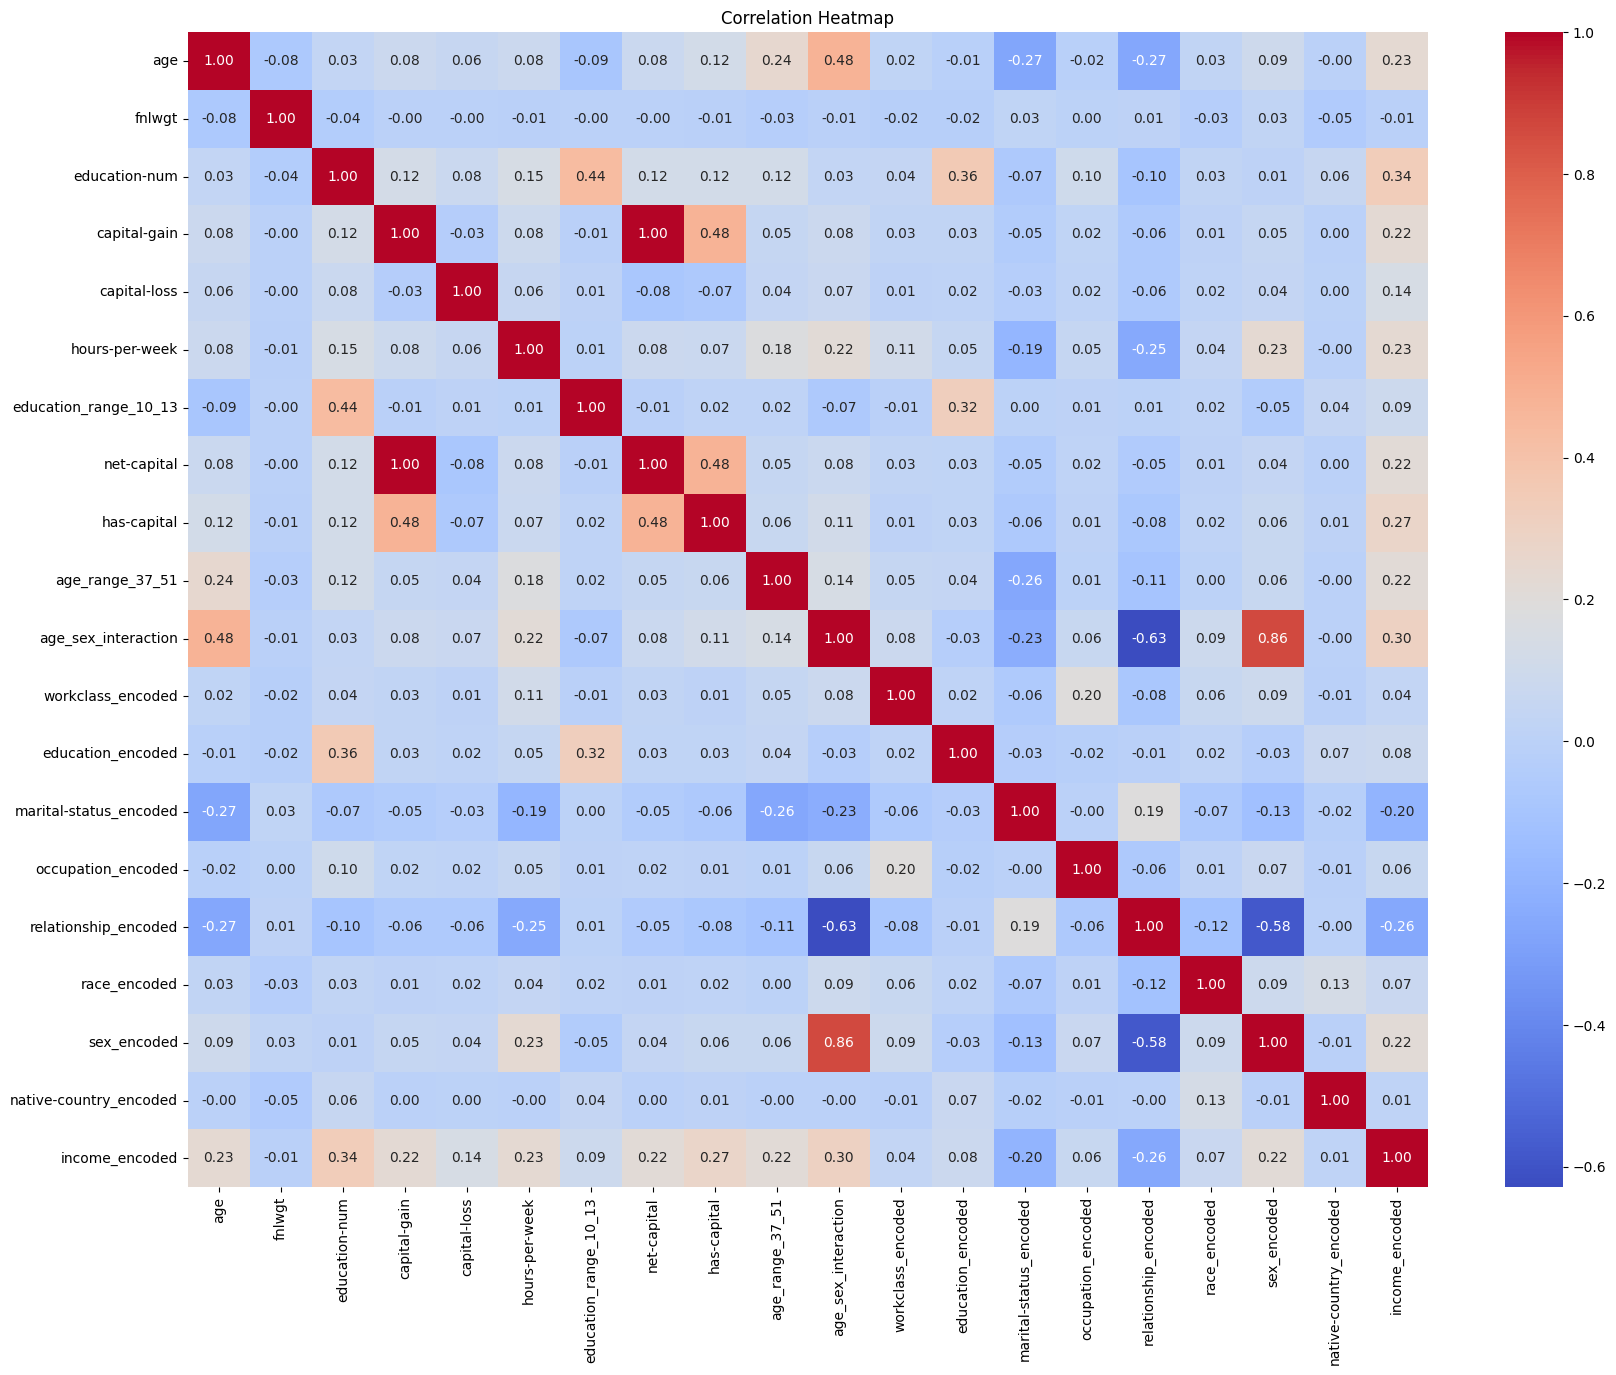

In [38]:
# Set the size of the heatmap figure
plt.figure(figsize=(20, 15))

# Create a heatmap with correlation values annotated
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap') # Set the title of the plot
plt.show() # Display the heatmap


### Encoding Categorical Columns in the Dataset

In this data preprocessing step, categorical columns in the original dataset are encoded using the LabelEncoder from the scikit-learn library. The goal is to convert categorical variables into numerical format, which is often required for machine learning algorithms.

#### Code Overview:

- **Drop 'income_binary' Column:**
  - The binary income column, 'income_binary,' is dropped from the DataFrame as it is not needed for encoding categorical variables because whem encoding 'income' column it will give same output as 'income_binary' column.

- **Encode Categorical Columns:**
  - The `encode_categorical_columns` function is defined to handle the encoding process.
  - NaN values in categorical columns are replaced with a placeholder value ('unknown') to ensure compatibility with LabelEncoder, but as there is no missing values in this cata base no changes will be applied.
  - The LabelEncoder is used to transform categorical columns into numerical representations. Encoded values are stored in new columns appended with '_encoded.'

- **Comparison of Unique Values:**
  - After encoding, a loop is initiated to compare unique values between the original and encoded columns.
  - This comparison helps ensure the integrity of the encoding process and provides insights into any changes.


These preprocessing steps contribute to the creation of a numerical representation of categorical data, making it suitable for machine learning algorithms.


### Getting Top Highest Correlations With 'income_encoded'

In [39]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Get the top 13 highest correlations with 'income_encoded'
top_correlations = correlation_matrix['income_encoded'].abs().sort_values(ascending=False).head(13)

# Display the top correlations
print("Top 13 highest correlations with 'income_encoded':")
print(top_correlations)
# Get the column names with the top 13 highest correlations
selected_columns = top_correlations.index.tolist()

# Create a new DataFrame using only the selected columns
new_dataset = df_encoded[selected_columns]

# Display the new dataset
print("New dataset using top correlated columns:")
new_dataset.head()

Top 13 highest correlations with 'income_encoded':
income_encoded            1.000000
education-num             0.336916
age_sex_interaction       0.300350
has-capital               0.272113
relationship_encoded      0.256398
hours-per-week            0.232705
age                       0.230823
capital-gain              0.224668
sex_encoded               0.217432
age_range_37_51           0.217133
net-capital               0.216413
marital-status_encoded    0.199437
capital-loss              0.144134
Name: income_encoded, dtype: float64
New dataset using top correlated columns:


,income_encoded,education-num,age_sex_interaction,has-capital,relationship_encoded,hours-per-week,age,capital-gain,sex_encoded,age_range_37_51,net-capital,marital-status_encoded,capital-loss
0,0,7,0,False,3,25,18,0,0,0,0,4,0
1,1,13,36,False,0,40,36,0,1,0,-1902,2,1902
2,0,10,35,False,0,40,35,0,1,0,-1579,2,1579
3,0,10,0,False,4,10,55,0,0,0,0,5,0
4,0,10,0,False,4,40,35,0,0,0,0,4,0


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Assuming you have loaded your DataFrame 'df' before this point

# Split the data into features (X) and target variable (y)
X = df_encoded.drop(['income_encoded'], axis=1)
y = df_encoded['income_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with column names and their explained variance
variance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Explained Variance': explained_variance_ratio})

# Print the DataFrame


variance_df['Explained Variance']=round(variance_df['Explained Variance']*100,2)


variance_df=variance_df.sort_values(['Explained Variance'],ascending=False)


variance_df['Cumulative Variance'] = np.cumsum(variance_df['Explained Variance'])


variance_df

,Feature,Explained Variance,Cumulative Variance
0,age,15.92,15.92
1,fnlwgt,11.94,27.86
2,education-num,9.43,37.29
3,capital-gain,6.91,44.20
4,capital-loss,6.24,50.44
5,hours-per-week,5.99,56.43
6,education_range_10_13,5.22,61.65
7,net-capital,5.18,66.83
8,has-capital,4.82,71.65
9,age_range_37_51,4.53,76.18


## Grid Search and Ml Algorithm 

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def grid_search_best_model(X, y, df_1):
    # Feature scaling using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Separate features and target variable on the scaled data
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

    # Initialize classifiers
    naive_bayes_model = GaussianNB()
    knn_model = KNeighborsClassifier()
    logistic_model = LogisticRegression()
    svm_model = SVC()
    decision_tree_model = DecisionTreeClassifier(random_state=42)
    random_forest_model = RandomForestClassifier(random_state=42)

    # Define the parameter grid for each classifier
    param_grid_naive_bayes = {}
    param_grid_knn = {'n_neighbors': [3, 5, 7]}
    param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    param_grid_decision_tree = {'max_depth': [None, 5, 10, 15, 20]}
    param_grid_random_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15]}
    param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

    model_param_grids = {
        naive_bayes_model: param_grid_naive_bayes,
        knn_model: param_grid_knn,
        logistic_model: param_grid_logistic,
        decision_tree_model: param_grid_decision_tree,
        random_forest_model: param_grid_random_forest,
        svm_model: param_grid_svm,
    }

    best_model = None
    best_accuracy = 0
    best_params = None

    for model, param_grid in model_param_grids.items():
        # Perform grid search using cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model from grid search
        best_model_candidate = grid_search.best_estimator_
        best_params_candidate = grid_search.best_params_

        # Validate on the validation set
        y_val_pred = best_model_candidate.predict(X_val)
        validation_accuracy = accuracy_score(y_val, y_val_pred)
        print(f'{model.__class__.__name__} Validation Accuracy: {validation_accuracy}')

        # Print a classification report for the validation set
        report_val = classification_report(y_val, y_val_pred)
        print(report_val)

        # Evaluate on the test set
        y_test_pred = best_model_candidate.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f'{model.__class__.__name__} Test Accuracy: {test_accuracy}')

        # Print a classification report for the test set
        report_test = classification_report(y_test, y_test_pred)
        print(report_test)

        # Compare accuracies and update the best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = best_model_candidate
            best_params = best_params_candidate

        print('\n' + '-'*60 + '\n')

    print(f'The best model after grid search is {best_model.__class__.__name__} with Test Accuracy: {best_accuracy}')
    print(f'Best hyperparameters: {best_params}')

    # Save the DataFrame with the predicted income column
    df_1['predicted_income'] = best_model.predict(X_scaled)
    df_1.to_excel('Income_Train_Predicted.xlsx', index=False)

    return best_accuracy, best_params, best_model

# Separate features and target variable
X = new_dataset.drop(['income_encoded'], axis=1)  # Features
y = new_dataset['income_encoded']  # Target variable

# Call the function to perform grid search and train the best model
best_accuracy, best_params, best_model = grid_search_best_model(X, y, df)

GaussianNB Validation Accuracy: 0.7873800795569769
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      9725
           1       0.62      0.30      0.41      3096

    accuracy                           0.79     12821
   macro avg       0.72      0.62      0.64     12821
weighted avg       0.76      0.79      0.76     12821

GaussianNB Test Accuracy: 0.7965423111919927
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4205
           1       0.63      0.32      0.43      1290

    accuracy                           0.80      5495
   macro avg       0.72      0.63      0.65      5495
weighted avg       0.77      0.80      0.77      5495


------------------------------------------------------------

KNeighborsClassifier Validation Accuracy: 0.8383901411746354
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      9725
           1     

In [42]:
best_accuracy, best_params, best_model

(0.8624203821656051,
 {'max_depth': 10, 'n_estimators': 200},
 RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42))

In [43]:
# best_params={'max_depth': 10, 'n_estimators': 200}
# best_model=RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42))

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   education-num           36631 non-null  int64
 1   age_sex_interaction     36631 non-null  int64
 2   has-capital             36631 non-null  bool 
 3   relationship_encoded    36631 non-null  int32
 4   hours-per-week          36631 non-null  int64
 5   age                     36631 non-null  int64
 6   capital-gain            36631 non-null  int64
 7   sex_encoded             36631 non-null  int32
 8   age_range_37_51         36631 non-null  int64
 9   net-capital             36631 non-null  int64
 10  marital-status_encoded  36631 non-null  int32
 11  capital-loss            36631 non-null  int64
dtypes: bool(1), int32(3), int64(8)
memory usage: 2.7 MB


### Grid Search for Best Model

In this notebook, I'm performing a grid search to find the best hyperparameters for various classification models. The goal is to optimize model performance on predicting the 'income_encoded' target variable.

#### Models and Hyperparameters

I've selected several classifiers, each with its hyperparameter grid for optimization:
- Gaussian Naive Bayes
- k-Nearest Neighbors
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine

The hyperparameters for each model have been carefully chosen to cover a range of possibilities.

#### Data Splitting

I've split the dataset into training, validation, and test sets to ensure fair evaluation:
- 70% for training
- 10% for validation
- 20% for final testing

This helps in preventing overfitting and allows for model evaluation on unseen data.

#### Grid Search and Evaluation

The grid search is conducted using cross-validation (cv=5) to explore different hyperparameter combinations. For each model, the best hyperparameters are selected based on accuracy on the training set.

The validation set is then used to assess the model's performance with the chosen hyperparameters. Finally, the test set provides an unbiased evaluation of the model's generalization to new data.

#### Best Model Selection

I'm tracking the best-performing model based on test accuracy. This ensures that the model selected has demonstrated superior performance on unseen data.

Let's dive into the grid search and find the optimal configuration for each model.


# For Test Data

In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

def fill_na_mode(df):
    # Fill missing values with mode for each column
    imputer = SimpleImputer(strategy='most_frequent')
    df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_filled

def label_encode(df, label_encoders=None):
    # Label encode categorical columns
    df_encoded = df.copy()
    if label_encoders is None:
        label_encoders = {}
    for column in df_encoded.select_dtypes(include=['object']).columns:
        if column in label_encoders:
            # Use existing label encoder
            df_encoded[column] = label_encoders[column].transform(df_encoded[column])
        else:
            # Create a new label encoder for unseen columns
            le = LabelEncoder()
            df_encoded[column] = le.fit_transform(df_encoded[column])
            label_encoders[column] = le
    return df_encoded, label_encoders

def preprocess_and_predict(test_df, best_model, best_params,label_encoders=None):
    # Fill missing values with mode
    test_df_filled = fill_na_mode(test_df)

    # Combine 'capital-gain' and 'capital-loss' into a single feature 'net-capital'
    test_df_filled['net-capital'] = test_df_filled['capital-gain'] - test_df_filled['capital-loss']

    # Create a 'has-capital' binary feature indicating if the individual has any capital gains or losses
    test_df_filled['has-capital'] = (test_df_filled['capital-gain'] > 0) | (test_df_filled['capital-loss'] > 0)

    # If 'net-capital' is negative, set 'has-capital' to False for half of the rows
    test_df_filled.loc[test_df_filled['net-capital'] < 0, 'has-capital'] = False
    
    test_df_filled['age_range_37_51'] = test_df_filled['age'].apply(lambda x: 1 if 37 <= x <= 51 else 0)
    test_df_filled['education_range_10_13'] = test_df_filled['education-num'].apply(lambda x: 1 if 10 <= x <= 13 else 0)
    test_df_filled['age_sex_interaction'] = test_df_filled['age'] * test_df_filled['sex'].map({'Male': 1, 'Female': 0})
    
    # Label encode categorical columns
    test_df_filled, label_encoders = label_encode(test_df_filled, label_encoders)
    
    selected_columns = ['education-num','age_sex_interaction','has-capital','relationship','hours-per-week','age','capital-gain','sex','age_range_37_51','net-capital','marital-status','capital-loss']
    new_dataset = test_df_filled[selected_columns]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(new_dataset)
    
    # Predict using the best model and parameters
    predictions = best_model.predict(X_scaled)

    return predictions, label_encoders

# Assuming `best_model` and `best_params` are obtained from the grid_search_best_model function
# Assuming `test_df` is your test dataset
df_2 = pd.read_excel('Income Test.xlsx')
test_df = df_2.drop(["fnlwgt"], axis=1)

# Perform predictions
test_predictions, label_encoders = preprocess_and_predict(test_df, best_model, best_params)

# You can now use `test_predictions` as the predicted values for your test dataset

In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             12211 non-null  int64 
 1   workclass       11972 non-null  object
 2   education       12211 non-null  object
 3   education-num   12211 non-null  int64 
 4   marital-status  12211 non-null  object
 5   occupation      11971 non-null  object
 6   relationship    12211 non-null  object
 7   race            12211 non-null  object
 8   sex             12211 non-null  object
 9   capital-gain    12211 non-null  int64 
 10  capital-loss    12211 non-null  int64 
 11  hours-per-week  12211 non-null  int64 
 12  native-country  12133 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [65]:
# Assuming `test_predictions` is the predicted values obtained from the preprocess_and_predict function

result_df = pd.DataFrame({'predicted_income': test_predictions})

# Save the DataFrame to an Excel file
result_df.to_excel('predicted_income_results.xlsx', index=False)


In [66]:
x=pd.read_excel('predicted_income_results.xlsx')
y= pd.read_excel('Income Test Prediction 03.xlsx')

In [67]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  12211 non-null  int64
dtypes: int64(1)
memory usage: 95.5 KB


In [68]:
xp=x['predicted_income']
yp=y['INCOME']

In [69]:
print(classification_report(xp,yp))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10050
           1       0.77      0.77      0.77      2161

    accuracy                           0.92     12211
   macro avg       0.86      0.86      0.86     12211
weighted avg       0.92      0.92      0.92     12211



# For users

In [71]:
user_input = {
    'age': 53,
    'workclass': 'State-gov',
    'education': 'Doctorate',
    'education-num': 16,
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Adm-clerical',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'capital-gain': 0,
    'capital-loss': 0,
    'hours-per-week': 50,
    'native-country': 'United-States',
}

# Create a DataFrame from the user input
user_df = pd.DataFrame([user_input])
# Preprocess and predict
user_predictions, _ = preprocess_and_predict(user_df, best_model, best_params, label_encoders)

# Print the predicted income for the user
print("Predicted Income:", user_predictions[0])


Predicted Income: 0


In [ ]:
53	State-gov	53197	Doctorate	16	Married-civ-spouse	Adm-clerical	Husband	White	Male	0	0	50	United-States


In [90]:
def predict_income(user_input, best_model, label_encoders):
    # Create a DataFrame with a single row for user input
    user_df = pd.DataFrame([user_input])

    # Fill missing values with mode
    user_df_filled = fill_na_mode(user_df)

    # Combine 'capital-gain' and 'capital-loss' into a single feature 'net-capital'
    user_df_filled['net-capital'] = user_df_filled['capital-gain'] - user_df_filled['capital-loss']

    # Create a 'has-capital' binary feature indicating if the individual has any capital gains or losses
    user_df_filled['has-capital'] = (user_df_filled['capital-gain'] > 0) | (user_df_filled['capital-loss'] > 0)

    # If 'net-capital' is negative, set 'has-capital' to False for half of the rows
    user_df_filled.loc[user_df_filled['net-capital'] < 0, 'has-capital'] = False

    # Label encode categorical columns using the saved label_encoders
    user_df_encoded, _ = label_encode(user_df_filled, label_encoders)

    # Get the feature names after label encoding
    encoded_feature_names = user_df_encoded.columns.tolist()

    # Ensure the input data has the same columns as the training data
    required_columns = encoded_feature_names  # Adjust this based on your specific features
    user_df_encoded = user_df_encoded.reindex(columns=required_columns, fill_value=0)

    # Predict using the best model
    prediction = best_model.predict(user_df_encoded)

    # Map the binary prediction to the original income categories
    predicted_income_category = ' >50K' if prediction[0] == 1 else ' <=50K'

    return predicted_income_category

# Example of how to use the predict_income function
user_input = {
    'age': 35,
    'workclass': 'Private',

    'education': 'Bachelors',
    'education-num': 13,
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Tech-support',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'capital-gain': 0,
    'capital-loss': 0,
    'hours-per-week': 40,
    'native-country': 'United-States',
}

predicted_income = predict_income(user_input, best_model, label_encoders)
print(f"The predicted income category for the user is: {predicted_income}")


ValueError: X has 15 features, but RandomForestClassifier is expecting 18 features as input.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Updated CATEGORICAL_VALUES with mappings
CATEGORICAL_VALUES = {
    'workclass': {1: 'Private', 2: '?', 3: 'Local-gov', 4: 'Self-emp-not-inc', 5: 'Self-emp-inc', 6: 'State-gov', 7: 'Federal-gov', 8: 'nan', 9: 'Without-pay', 10: 'Never-worked'},
    'education': {1: '11th', 2: 'Bachelors', 3: 'Some-college', 4: 'HS-grad', 5: 'Assoc-voc', 6: '5th-6th', 7: '9th', 8: 'Assoc-acdm', 9: 'Prof-school', 10: '10th', 11: '7th-8th', 12: 'Masters', 13: 'Doctorate', 14: '12th', 15: '1st-4th', 16: 'Preschool'},
    'marital-status': {1: 'Never-married', 2: 'Married-civ-spouse', 3: 'Separated', 4: 'Divorced', 5: 'Widowed', 6: 'Married-spouse-absent', 7: 'Married-AF-spouse'},
    'occupation': {1: 'Sales', 2: 'Tech-support', 3: 'Handlers-cleaners', 4: 'Exec-managerial', 5: '?', 6: 'Adm-clerical', 7: 'Farming-fishing', 8: 'Machine-op-inspct', 9: 'Craft-repair', 10: 'Other-service', 11: 'Prof-specialty', 12: 'Transport-moving', 13: 'nan', 14: 'Protective-serv', 15: 'Priv-house-serv', 16: 'Armed-Forces'},
    'relationship': {1: 'Own-child', 2: 'Husband', 3: 'Unmarried', 4: 'Not-in-family', 5: 'Other-relative', 6: 'Wife'},
    'race': {1: 'White', 2: 'Black', 3: 'Amer-Indian-Eskimo', 4: 'Asian-Pac-Islander', 5: 'Other'},
    'sex': {1: 'Female', 2: 'Male'},
    'native-country': {1: 'United-States', 2: 'Puerto-Rico', 3: 'England', 4: 'Yugoslavia', 5: 'nan', 6: 'Italy', 7: 'Japan', 8: '?', 9: 'Jamaica', 10: 'Canada', 11: 'India', 12: 'China', 13: 'Dominican-Republic', 14: 'Mexico', 15: 'South', 16: 'Iran', 17: 'Nicaragua', 18: 'Guatemala', 19: 'El-Salvador', 20: 'Haiti', 21: 'Germany', 22: 'Scotland', 23: 'Columbia', 24: 'Hong', 25: 'Ireland', 26: 'Philippines', 27: 'Portugal', 28: 'Cuba', 29: 'Laos', 30: 'Outlying-US(Guam-USVI-etc)', 31: 'Ecuador', 32: 'Vietnam', 33: 'Peru', 34: 'Trinadad&Tobago', 35: 'Taiwan', 36: 'France', 37: 'Poland', 38: 'Greece', 39: 'Cambodia', 40: 'Honduras', 41: 'Hungary', 42: 'Thailand'},
}


def display_mapping(column_name):
    print(f"\n{column_name}:")

    values = CATEGORICAL_VALUES.get(column_name, {})

    if values:
        for i, (key, value) in enumerate(values.items(), 1):
            print(f"{key}: {value}")
    else:
        print("No unique values available for the specified column.")

def label_encode_user_input(user_input, label_encoders):
    user_df = pd.DataFrame([user_input])

    # Label encode categorical columns using the saved label_encoders
    for column, encoder in label_encoders.items():
        if column in user_input:
            # If the user input has a categorical column that was present during training
            user_df[column] = encoder.transform([user_input[column]])[0]
        else:
            # If the user input has a new categorical column, assign a placeholder value
            user_df[column] = -1

    return user_df

def get_user_input():
    user_input = {}

    user_input['age'] = int(input("Enter age: "))

    # Categorical columns
    for col in CATEGORICAL_VALUES:
        display_mapping(col)
        chosen_value = int(input(f"Choose the number corresponding to {col}: "))
        user_input[col] = CATEGORICAL_VALUES[col].get(chosen_value, 'Unknown')
        print(f"{col}: {user_input[col]}")

    # Integer columns
    user_input['education-num'] = int(input("Enter education-num: "))
    user_input['capital-gain'] = int(input("Enter capital-gain: "))
    user_input['capital-loss'] = int(input("Enter capital-loss: "))
    user_input['hours-per-week'] = int(input("Enter hours-per-week: "))

    return user_input

# Example of how to use the interactive script
while True:
    user_input = get_user_input()
    predicted_income = predict_income(user_input, best_model, label_encoders)
    print(f"The predicted income category for the user is: {predicted_income}")

    another_prediction = input("Do you want to predict another income category? (yes/no): ")
    if another_prediction.lower() != 'yes':
        break


In [ ]:
62	?	144116	10th	6	Married-civ-spouse	?	Husband	White	Male	0	0	40	United-States	0
